#Netflix stock data analysis

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# objective


1) to find volume of stock traded
2) stock price when high ,low,open, close // visualizatins
3) stock price via day , month and year and create visualizations 
4)top5 dates with highest stock price
5) top 6 dates with lowest stock price

In [52]:
# displaying the dataset
df=pd.read_csv(r"C:\Users\HP\Downloads\Netflix.csv")
df.to_string()

'            Date        Open        High         Low       Close   Adj Close     Volume\n0     2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429  104790000\n1     2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000   11104800\n2     2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143    6609400\n3     2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571    6757800\n4     2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429   10154200\n5     2002-05-31    1.078571    1.078571    1.071429    1.076429    1.076429    8464400\n6     2002-06-03    1.080000    1.149286    1.076429    1.128571    1.128571    3151400\n7     2002-06-04    1.135714    1.140000    1.110714    1.117857    1.117857    3105200\n8     2002-06-05    1.110714    1.159286    1.107143    1.147143    1.147143    1531600\n9     2002-06-06    1.150000    1.232143    1.148571    1.182143    1.182143    2305800\n10    2002-06-07    

In [5]:
# data cleaning and exploration
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [6]:
df.Date.dtype # checking the datatype of columns

dtype('O')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4874 non-null   object 
 1   Open       4874 non-null   float64
 2   High       4874 non-null   float64
 3   Low        4874 non-null   float64
 4   Close      4874 non-null   float64
 5   Adj Close  4874 non-null   float64
 6   Volume     4874 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 266.7+ KB


# the datetime column is in object hence we should change it to datetime

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4874 non-null   object 
 1   Open       4874 non-null   float64
 2   High       4874 non-null   float64
 3   Low        4874 non-null   float64
 4   Close      4874 non-null   float64
 5   Adj Close  4874 non-null   float64
 6   Volume     4874 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 266.7+ KB


In [54]:
df["Date"]=pd.to_datetime(df["Date"]) # using datetime function to change the datetime

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4874 non-null   datetime64[ns]
 1   Open       4874 non-null   float64       
 2   High       4874 non-null   float64       
 3   Low        4874 non-null   float64       
 4   Close      4874 non-null   float64       
 5   Adj Close  4874 non-null   float64       
 6   Volume     4874 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 266.7 KB


In [55]:
sns.set(rc={"figure.figsize":(10,5)}) # setting the size of figures

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4869,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


In [13]:
df=df.set_index(df["Date"])       #3 setting the index to date column

In [14]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2002-05-23,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


<Axes: xlabel='Date', ylabel='Volume'>

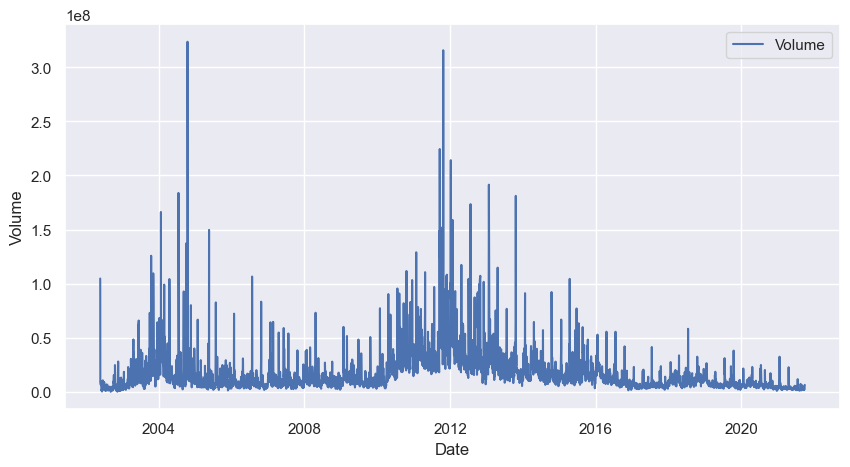

In [15]:
sns.lineplot(x=df.index, y= df.Volume,label ="Volume")

# for a better visualization we will use plotly library tooo

In [16]:
import plotly.express as px
import plotly.graph_objects as go

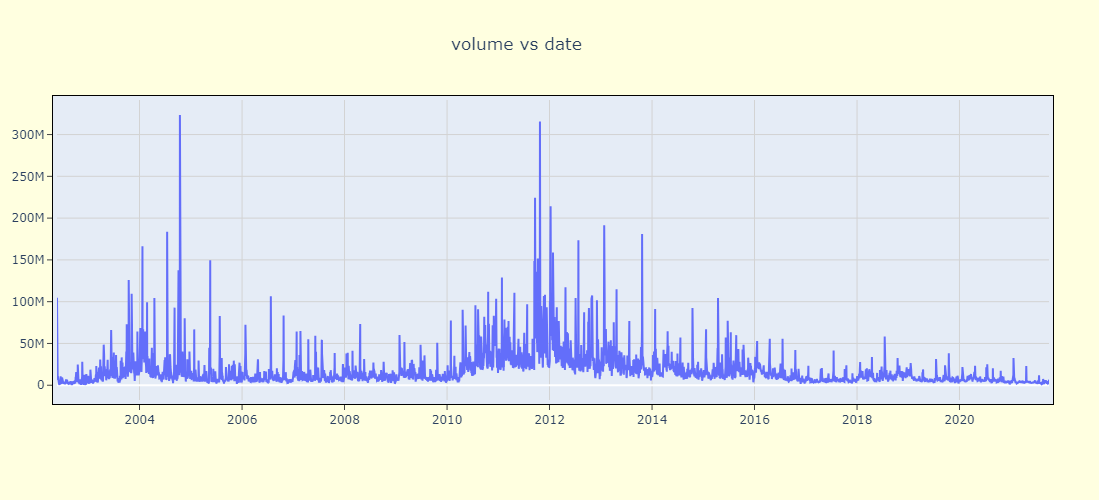

In [93]:
fig=go.Figure(go.Scatter(x=df.Date,y=df.Volume))
fig.update_layout(title="volume vs date")
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_layout( title_x= 0.47,
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightyellow",
)
fig.show()

# now we will show the stock when high wehn low and closing price in one graph

In [18]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2002-05-23,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


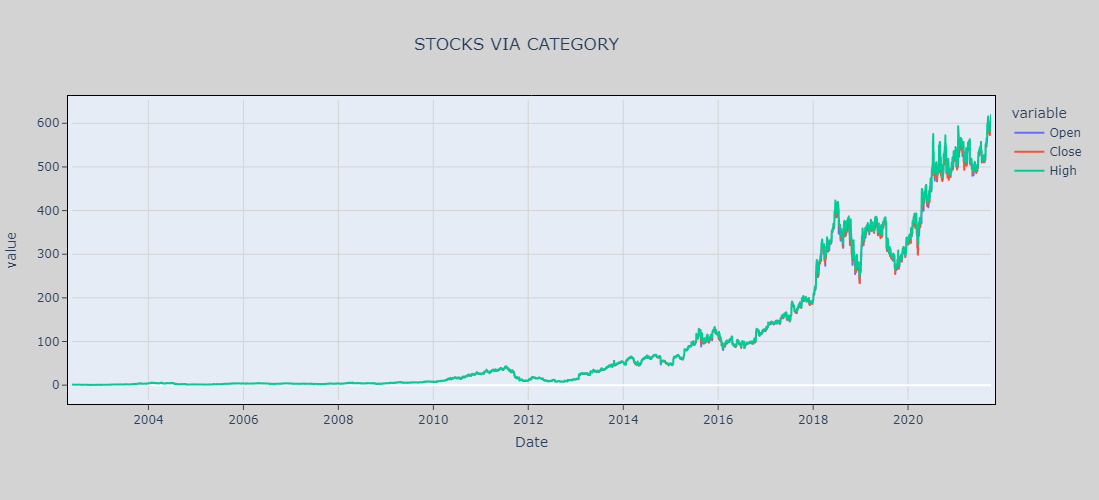

In [70]:
#df.plot(y=["Open","Close","High"],title="Netflix stock")
fig = px.line(df, x="Date",
              y=["Open","Close","High"] 
              , title=' STOCKS VIA CATEGORY')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_layout( title_x= 0.47,
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightgrey",
)
fig.show()

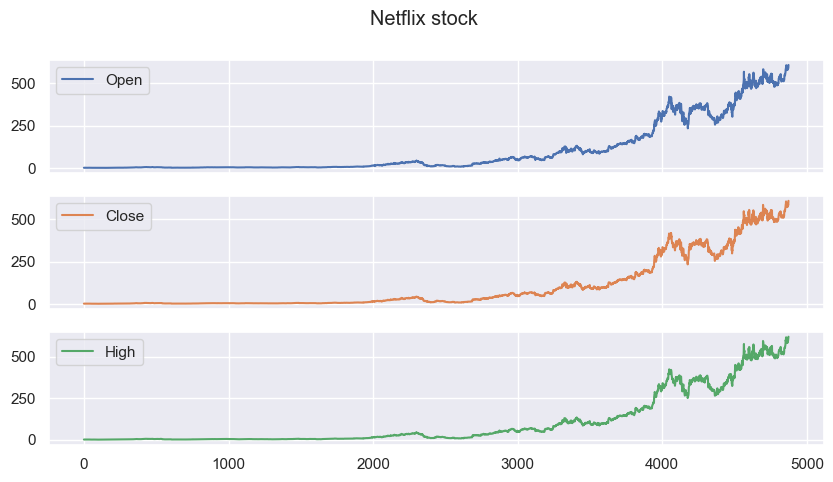

In [75]:
# plotting subplots for better visualization and analysis



df.plot(y=["Open","Close","High"]
        ,title="Netflix stock"
        ,subplots =True)
plt.show()

<Axes: xlabel='Years'>

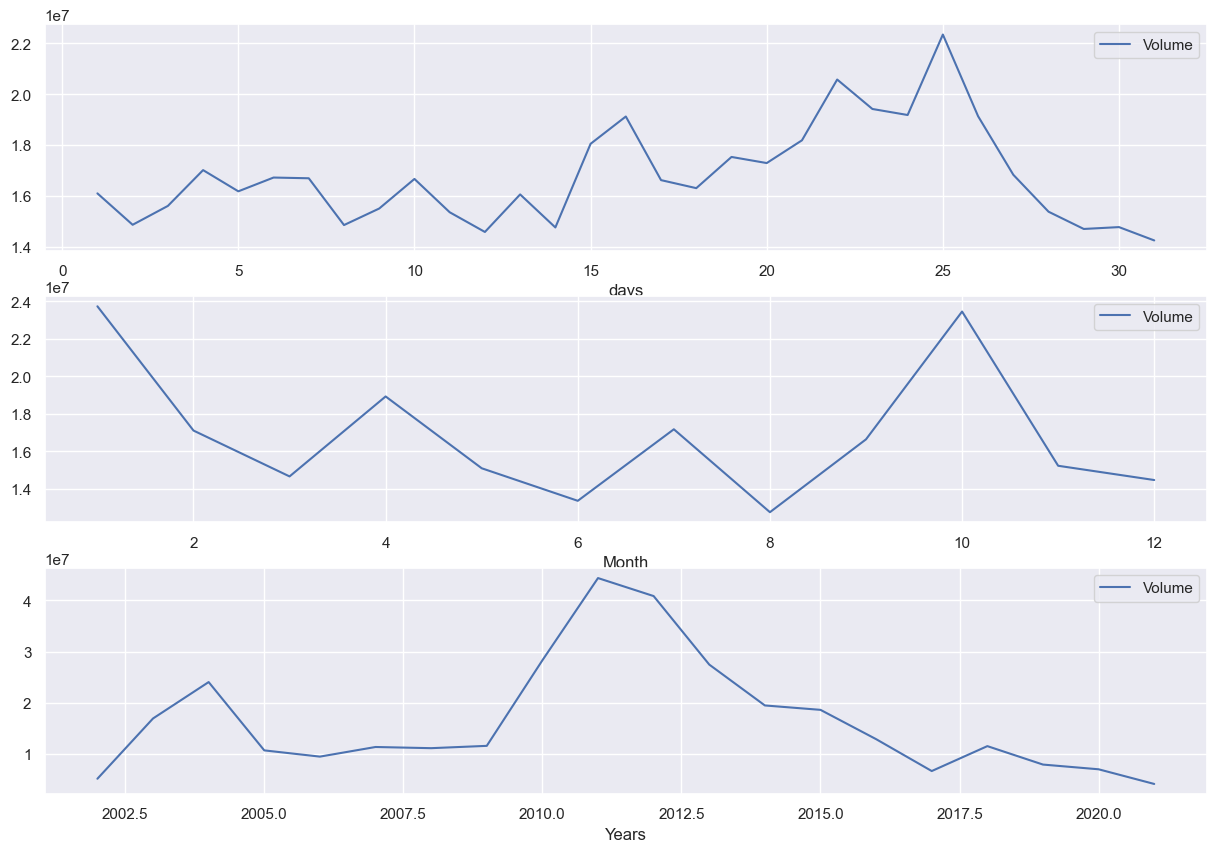

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(3,figsize=(15,10))

df.groupby(df.index.day).mean().plot(y="Volume",ax=ax1,xlabel="days")
df.groupby(df.index.month).mean().plot(y="Volume",ax=ax2,xlabel="Month")
df.groupby(df.index.year).mean().plot(y="Volume",ax=ax3,xlabel="Years")

# now we will  find dates with highest stock price

In [22]:
df    # displaying dataframe for analysis


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2002-05-23,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
2021-09-24,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
2021-09-27,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
2021-09-28,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100


In [23]:
a=df.sort_values("High",ascending=False).head(5)     # sorting values of high in order to get the highest values

In [24]:
a

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-09-30,2021-09-30,608.049988,619.000000,608.049988,610.340027,610.340027,6612600
2021-09-08,2021-09-08,603.840027,615.599976,595.710022,606.049988,606.049988,5424500
2021-09-07,2021-09-07,594.690002,613.849976,593.989990,606.710022,606.710022,5821400
2021-09-29,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000
2021-09-10,2021-09-10,598.159973,609.450012,593.669983,598.719971,598.719971,3948000


In [25]:
a["High"] # dates with highest stock price value

Date
2021-09-30    619.000000
2021-09-08    615.599976
2021-09-07    613.849976
2021-09-29    609.880005
2021-09-10    609.450012
Name: High, dtype: float64

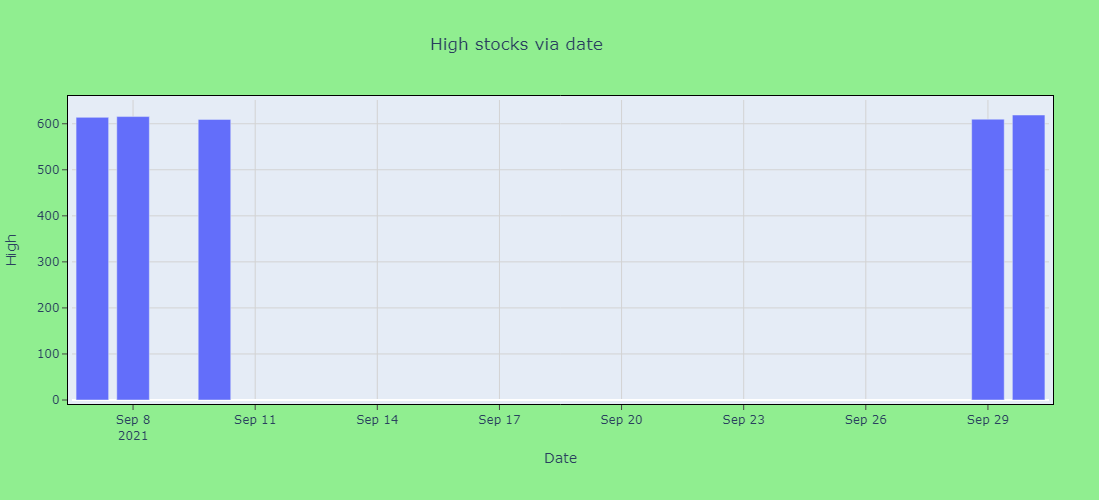

In [94]:
fig=px.bar(a,x="Date",y="High",title= "High stocks via date")
fig.update_layout(title_x=0.47)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_layout( title_x= 0.47,
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightgreen",
)
fig.show()

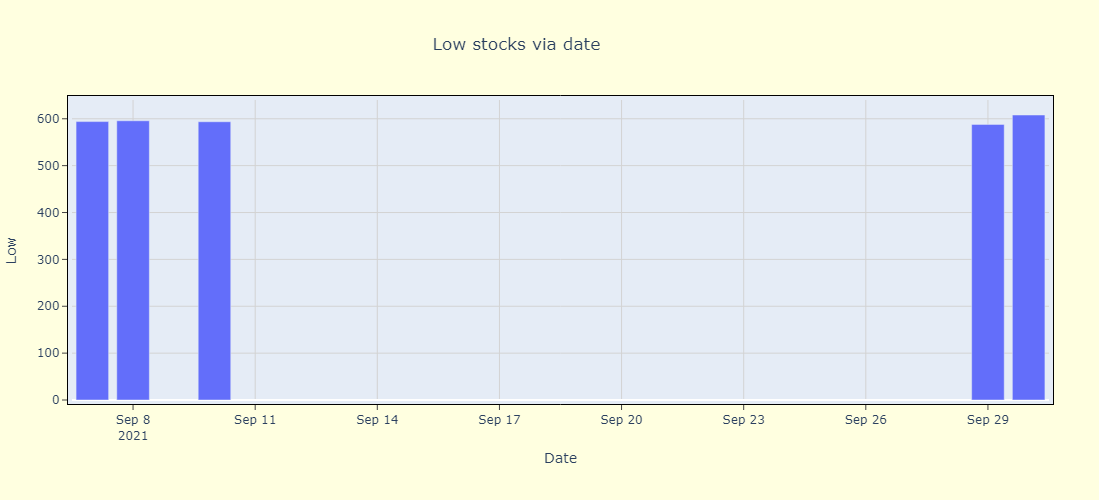

In [101]:
fig=px.bar(a,x="Date",y="Low",title="Low stocks via date")
fig.update_layout(title_x=0.47)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_layout( title_x= 0.47,
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightyellow",
)

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.show()

# NOW WE WILL FIND TOP 5 DATES WHEN STOCK WAS ITS LOWEST

In [28]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2002-05-23,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
2021-09-24,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
2021-09-27,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
2021-09-28,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100


#Top 5 dates when stock was lowest

In [29]:

low=df.sort_values("Low",ascending=False).head(5)

In [30]:
low

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-09-30,2021-09-30,608.049988,619.000000,608.049988,610.340027,610.340027,6612600
2021-09-09,2021-09-09,606.469971,609.440002,596.549988,597.539978,597.539978,2954200
2021-09-08,2021-09-08,603.840027,615.599976,595.710022,606.049988,606.049988,5424500
2021-09-07,2021-09-07,594.690002,613.849976,593.989990,606.710022,606.710022,5821400
2021-09-10,2021-09-10,598.159973,609.450012,593.669983,598.719971,598.719971,3948000


In [31]:
df.Low   # BELOW WE CAN SEE THE DATES AT WHICH THE STOCK WAS AT ITS LOWEST

Date
2002-05-23      1.145714
2002-05-24      1.197143
2002-05-28      1.157143
2002-05-29      1.085714
2002-05-30      1.071429
                 ...    
2021-09-24    583.640015
2021-09-27    576.929993
2021-09-28    580.159973
2021-09-29    588.010010
2021-09-30    608.049988
Name: Low, Length: 4874, dtype: float64

# now wwe will compare the trends of top dates when stock was at its peak and when it was on its lowest

<Axes: xlabel='Date', ylabel='Low'>

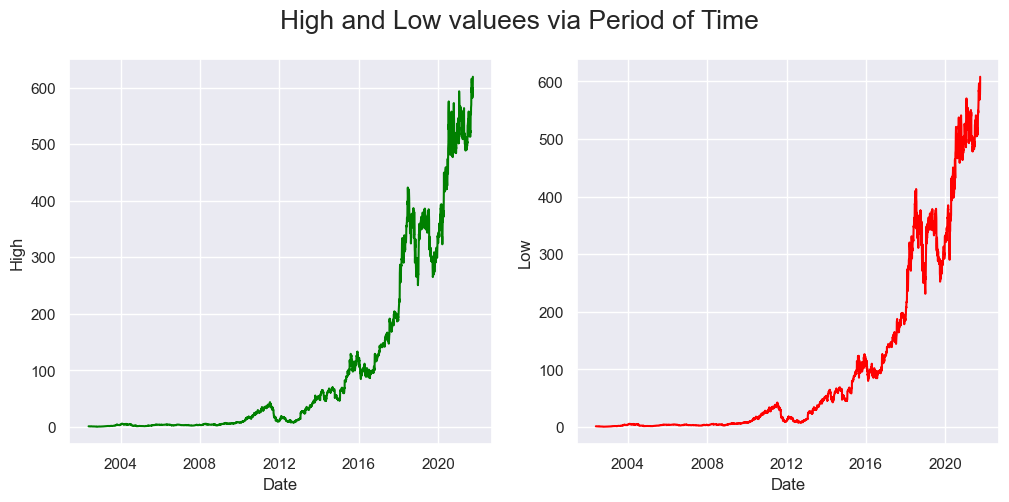

In [33]:
fig,axes= plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(12,5))
fig.suptitle("High and Low values via Period of Time",fontsize=19)
sns.lineplot(ax=axes[0],y=df['High'],x=df.index,color="green")
sns.lineplot(ax=axes[1],y=df['Low'],x=df.index,color="Red")

# NOW WE WILL FIND THE HIGH STOCKS VIA DATE AND VISUALIZE THEM ON A LINE CHART 

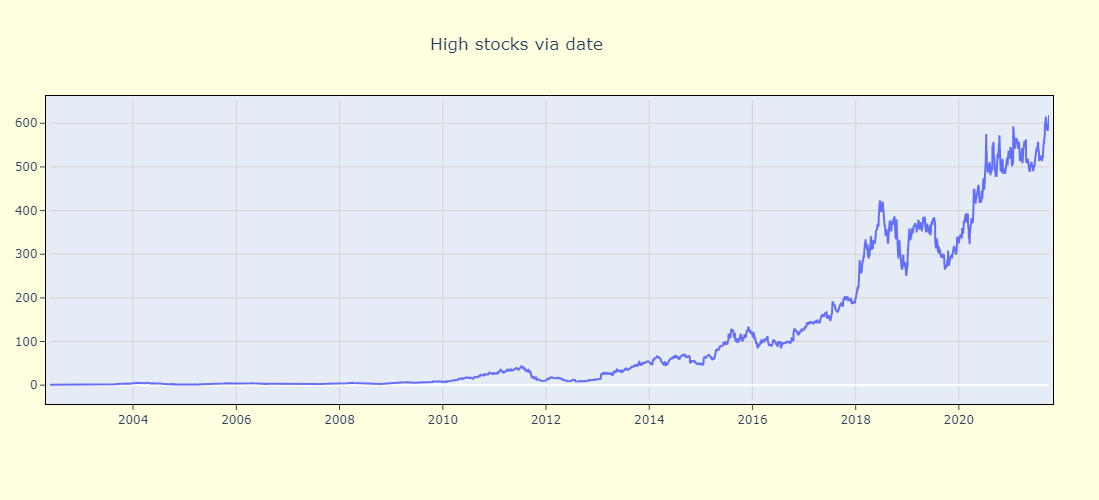

In [102]:
fig=go.Figure(go.Scatter(x=df.Date,y=df.High))
fig.update_layout(title=" High stocks via date")
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_layout( title_x= 0.47,
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightyellow",
)
fig.show()


NOW WE WILL FIND THE LOW STOCKS VIA DATE AND VISUALIZE THEM ON A LINE CHART

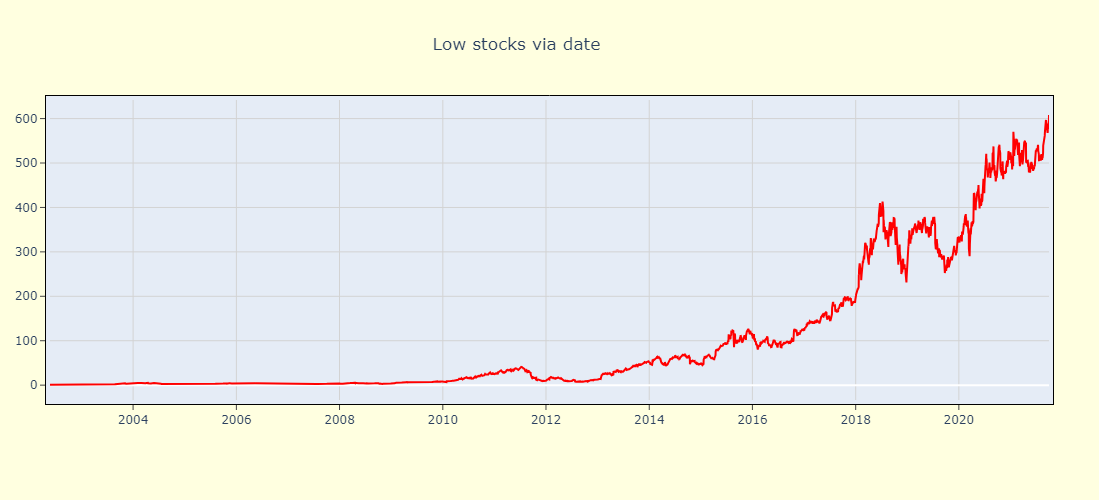

In [103]:
fig=go.Figure(go.Scatter(x=df.Date,y=df.Low))
fig.update_layout(title="Low stocks via date",title_x=0.47)
fig.update_traces(line_color='red')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_layout( title_x= 0.47,
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightyellow",
)
fig.show()

# conclusion

1) the above objective of the project was to determine the netflix stock analysis and dates when it was at its highest and when it was at its lowest for better visualizatio purpose i have used plotly library in order to cover detailed statistics of above graphs ]